In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Задание 1. Непрерывное и дискретное преобразование Фурье

In [2]:
def square(t):
    return np.piecewise(t, [np.abs(t) <= 1 / 2, np.abs(t) > 1 / 2], [1, 0])

In [3]:
T = 100
dt = 0.01
t = np.linspace(-T / 2, T / 2, int(T / dt))
V = 1 / dt
dv = 1 / T
freq = np.linspace(-V / 2, V / 2, int(V / dv))

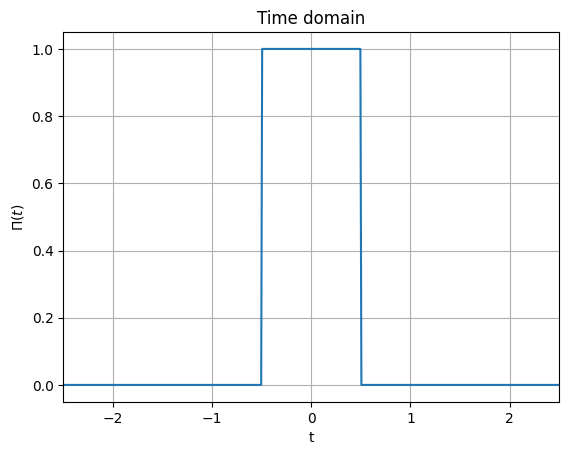

In [4]:
plt.plot(t, square(t))
plt.title('Time domain')
plt.xlim((-2.5, 2.5))
plt.ylabel('$\Pi(t)$')
plt.xlabel('t')
plt.grid(True)

## Истинный Фурье-образ

$$
\hat \Pi (\nu) = \int_{-\infty}^{+\infty} \Pi (t) e^{-2\pi i \nu t}dt = sinc(\nu)
$$

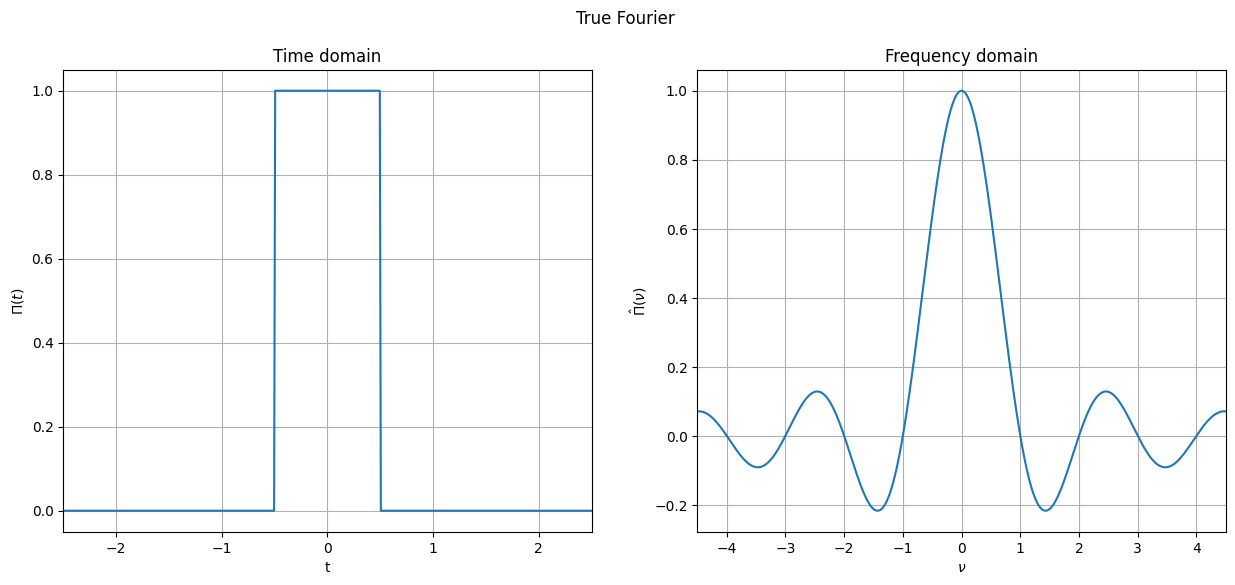

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('True Fourier')
plt.sca(axs[0])
plt.plot(t, square(t))
plt.title('Time domain')
plt.xlim((-2.5, 2.5))
plt.ylabel('$\Pi(t)$')
plt.xlabel('t')
plt.grid(True)
plt.sca(axs[1])
plt.plot(freq, np.sinc(freq))
plt.title('Frequency domain')
plt.xlabel('$\\nu$')
plt.ylabel('$\hat\Pi(\\nu)$')
plt.xlim((-4.5, 4.5))
plt.grid(True)

## Численное интегрирование

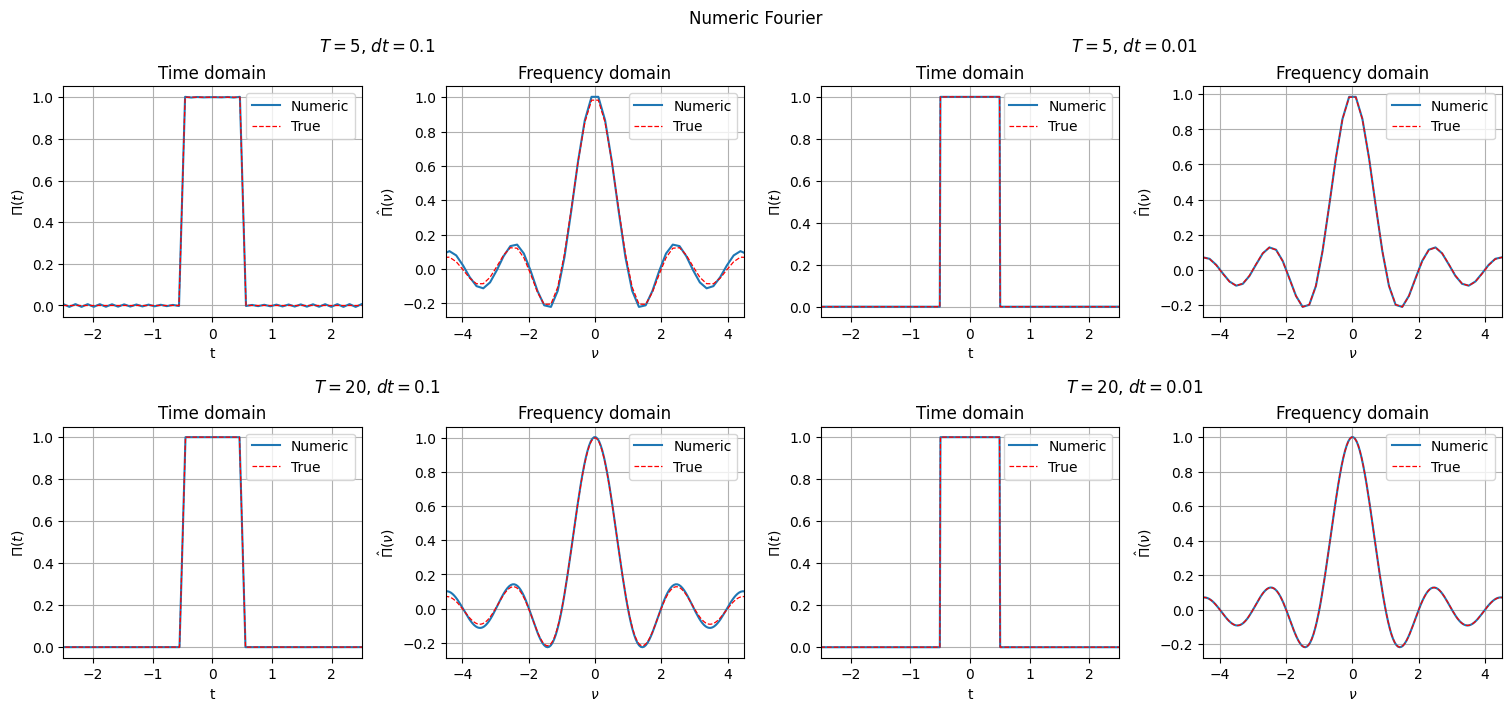

In [11]:
TT = [5, 5, 20, 20]
DT = [0.1, 0.01, 0.1, 0.01]
fig = plt.figure(constrained_layout=True, figsize=(15, 7))
subfigs = fig.subfigures(2, 2)

plt.suptitle('Numeric Fourier')

for outerind, subfig in enumerate(subfigs.flat):
    T = TT[outerind]
    dt = DT[outerind]

    subfig.suptitle(f'$T = {T}$, $dt = {dt}$')

    t = np.linspace(-T / 2, T / 2, int(T / dt))
    V = 1 / dt
    dv = 1 / T
    freq = np.linspace(-V / 2, V / 2, int(V / dv))

    ft = np.array([np.trapz(square(t) * np.exp(-1j * 2 * np.pi * v * t), t) for v in freq])
    ff = np.array([np.trapz(ft * np.exp(1j * 2 * np.pi * freq * tt), freq) for tt in t])

    axs = subfig.subplots(1, 2)
    fig.suptitle('Numeric Fourier')
    plt.sca(axs[0])
    plt.plot(t, ff, label='Numeric')
    plt.plot(t, square(t), 'r--', linewidth='0.9', label='True')  
    plt.title('Time domain')
    plt.xlim((-2.5, 2.5))
    plt.ylabel('$\Pi(t)$')
    plt.xlabel('t')
    plt.grid(True)
    plt.legend()
    plt.sca(axs[1])
    plt.plot(freq, ft, label='Numeric')
    plt.plot(freq, np.sinc(freq), 'r--', linewidth='0.9', label='True')
    plt.title('Frequency domain')
    plt.xlabel('$\\nu$')
    plt.ylabel('$\hat\Pi(\\nu)$')
    plt.xlim((-4.5, 4.5))
    plt.legend()
    plt.grid(True)

## Использование DFT

In [44]:
T = 100
dt = 0.01
t = np.linspace(-T / 2, T / 2, int(T / dt))
V = 1 / dt
dv = 1 / T
freq = np.linspace(-V / 2, V / 2, int(V / dv))

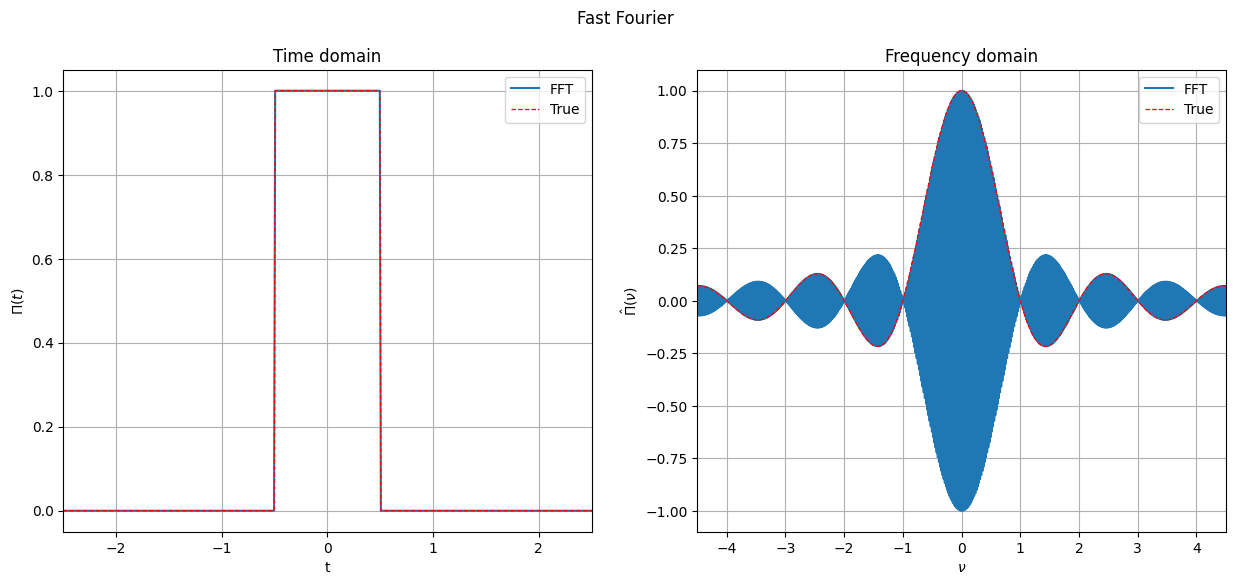

In [46]:
ft = (1 / np.sqrt(len(t))) * sp.fft.ifftshift(sp.fft.fft(square(t)))
ff = np.sqrt(len(t)) * sp.fft.ifft(sp.fft.ifftshift(ft))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Fast Fourier')
plt.sca(axs[0])
plt.plot(t, ff, label='FFT')
plt.plot(t, square(t), 'r--', linewidth='0.9', label='True')
plt.title('Time domain')
plt.xlim((-2.5, 2.5))
plt.ylabel('$\Pi(t)$')
plt.xlabel('t')
plt.legend()
plt.grid(True)
plt.sca(axs[1])
plt.plot(freq, ft, label='FFT')
plt.plot(freq, np.sinc(freq), 'r--', linewidth='0.9', label='True')
plt.title('Frequency domain')
plt.xlabel('$\\nu$')
plt.ylabel('$\hat\Pi(\\nu)$')
plt.xlim((-4.5, 4.5))
plt.legend()
plt.grid(True)

## Приближение непрерывного с помощью DFT

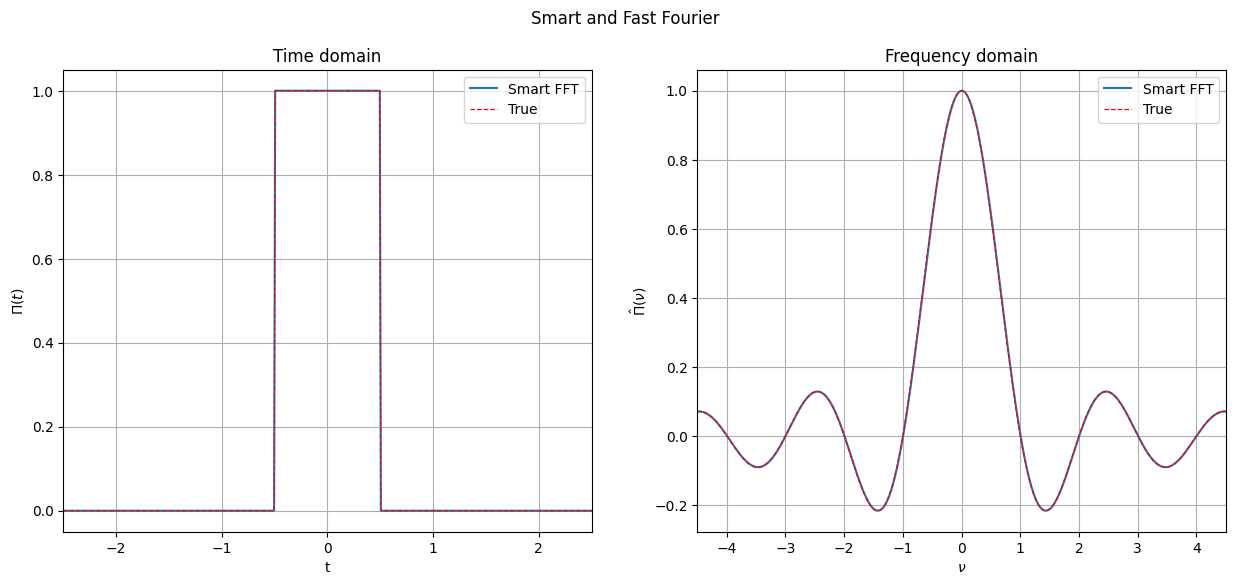

In [48]:
ft = (1 / np.sqrt(len(t))) * sp.fft.ifftshift(sp.fft.fft(square(t))) 
ff = np.sqrt(len(t)) * sp.fft.ifft(sp.fft.ifftshift(ft))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Smart and Fast Fourier')
plt.sca(axs[0])
plt.plot(t, ff, label='Smart FFT')
plt.plot(t, square(t), 'r--', linewidth='0.9', label='True')
plt.title('Time domain')
plt.xlim((-2.5, 2.5))
plt.ylabel('$\Pi(t)$')
plt.xlabel('t')
plt.legend()
plt.grid(True)
plt.sca(axs[1])
plt.plot(freq[::2], ft[::2], label='Smart FFT')
plt.plot(freq, np.sinc(freq), 'r--', linewidth='0.9', label='True')
plt.title('Frequency domain')
plt.xlabel('$\\nu$')
plt.ylabel('$\hat\Pi(\\nu)$')
plt.xlim((-4.5, 4.5))
plt.legend()
plt.grid(True)

# Задание 2. Сэмплирование

## Сэмплирование синусов

In [163]:
def y(t, a1 = 1, a2 = 0.5, omega1 = 2, omega2 = 20, phi1 = np.pi / 6, phi2 = np.pi / 3):
    return a1 * np.sin(omega1 * t + phi1) + a2 * np.sin(omega2 * t + phi2)

In [164]:
T = 100
dt = 0.001
t = np.linspace(-T / 2, T / 2, int(T / dt))
Y = y(t)

Text(0, 0.5, 'y(t)')

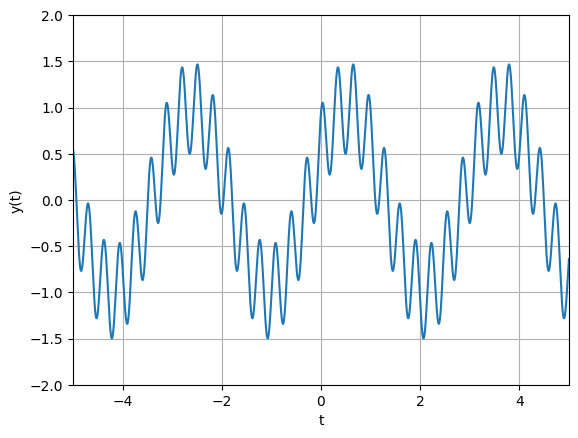

In [165]:
plt.plot(t, Y)
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(-2, 2)
plt.xlabel('t')
plt.ylabel('y(t)')

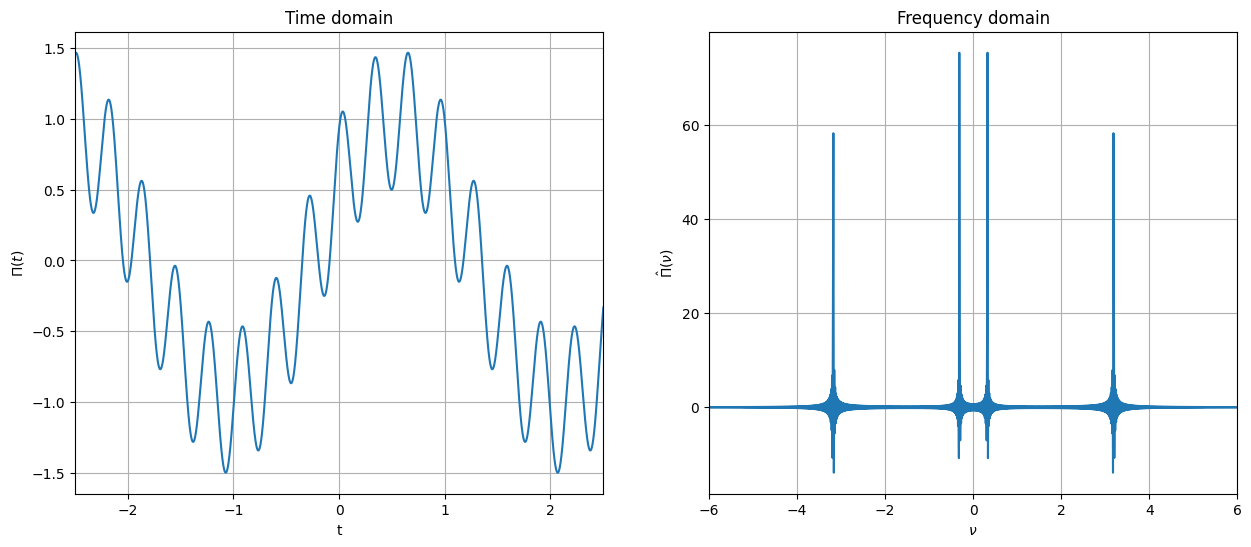

In [166]:
ft = (1 / np.sqrt(len(t))) * sp.fft.ifftshift(sp.fft.fft(sp.fft.fftshift(Y)))
ff = np.sqrt(len(t)) * sp.fft.fftshift(sp.fft.ifft(sp.fft.ifftshift(ft)))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.sca(axs[0])
plt.plot(t, ff, label='Smart FFT')
plt.title('Time domain')
plt.xlim((-2.5, 2.5))
plt.ylabel('$\Pi(t)$')
plt.xlabel('t')
plt.grid(True)
plt.sca(axs[1])
V = 1 / dt
dv = 1 / T
freq = np.linspace(-V / 2, V / 2, int(V / dv))
plt.plot(freq, ft, label='Smart FFT')
plt.title('Frequency domain')
plt.xlabel('$\\nu$')
plt.ylabel('$\hat\Pi(\\nu)$')
plt.xlim((-6, 6))
plt.grid(True)

In [171]:
B = 5
sample_step = 1 / (2 * B)
t_sampled = np.linspace(-T / 2, T / 2, int(T / sample_step))
y_sampled = y(t_sampled)

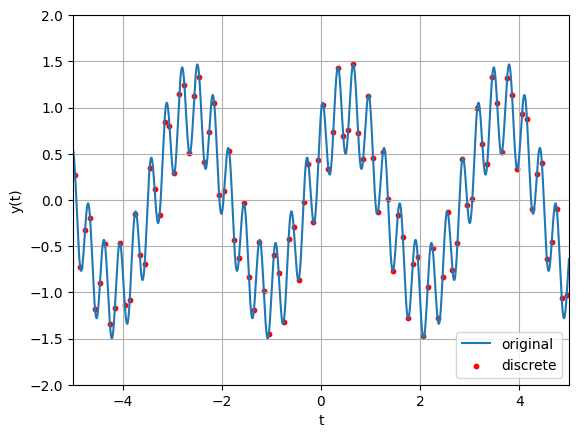

In [172]:
plt.plot(t, Y, label='original')
plt.scatter(t_sampled, y_sampled, s=10, color='red', label='discrete')
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(-2, 2)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()

In [173]:
def y_inter(t, t_sampled, y_sampled):
    part_sum = 0
    for i, t_n in enumerate(t_sampled):
        part_sum += y_sampled[i] * np.sinc(2 * B * (t - t_n))
    return part_sum

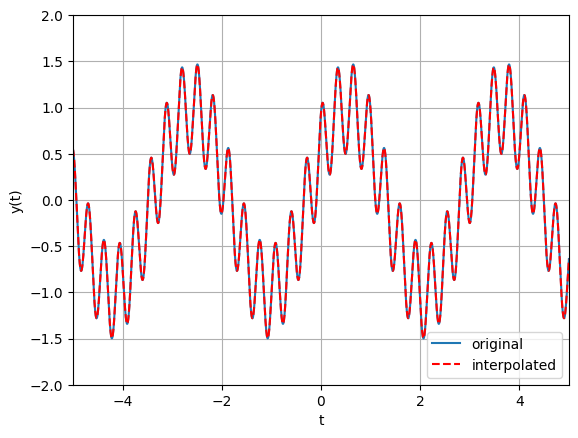

In [174]:
plt.plot(t, Y, label='original')
plt.plot(t, y_inter(t, t_sampled, y_sampled), 'r--', label='interpolated')
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(-2, 2)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()

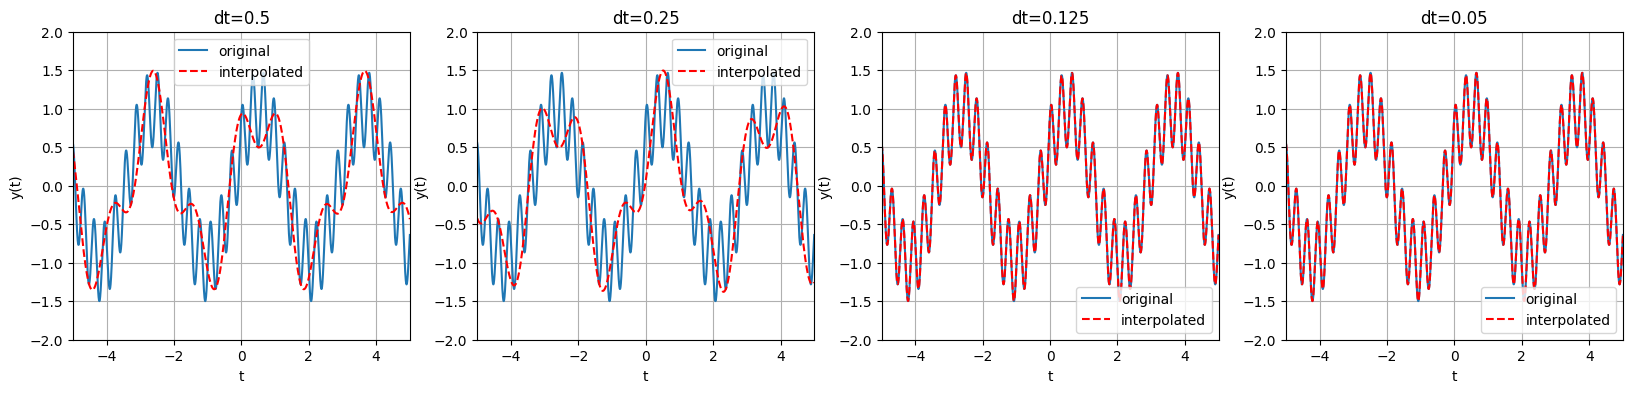

In [184]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
#fig.tight_layout()
BB = [1, 2, 4, 10]
for i in range(4):
    B = BB[i]
    sample_step = 1 / (2 * B)
    t_sampled = np.linspace(-T / 2, T / 2, int(T / sample_step))
    y_sampled = y(t_sampled)
    plt.sca(axs[i])
    plt.title(f'dt={1/(2*B)}')
    plt.plot(t, Y, label='original')
    plt.plot(t, y_inter(t, t_sampled, y_sampled), 'r--', label='interpolated')
    plt.grid(True)
    plt.xlim(-5, 5)
    plt.ylim(-2, 2)
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()

## Сэмплирование sinus cardinalis

In [185]:
def y(t, b = 2):
    return np.sinc(b * t)

In [186]:
T = 100
dt = 0.001
t = np.linspace(-T / 2, T / 2, int(T / dt))
Y = y(t)

Text(0, 0.5, 'y(t)')

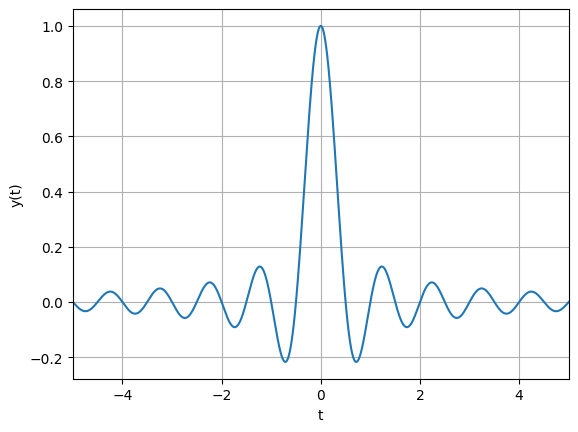

In [187]:
plt.plot(t, Y)
plt.grid(True)
plt.xlim(-5, 5)
plt.xlabel('t')
plt.ylabel('y(t)')

In [210]:
B = 2
sample_step = 1 / (2 * B)
t_sampled = np.linspace(-T / 2, T / 2, int(T / sample_step))
y_sampled = y(t_sampled)

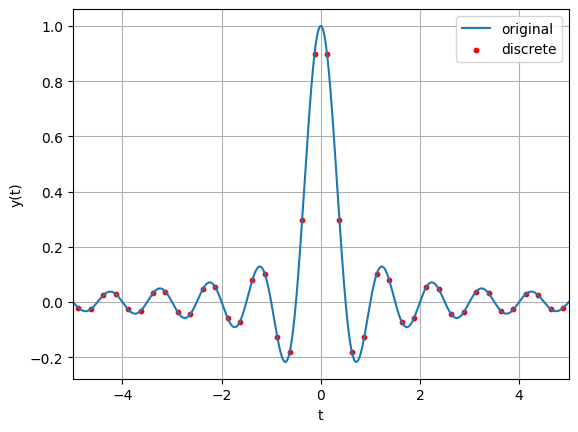

In [214]:
plt.plot(t, Y, label='original')
plt.scatter(t_sampled, y_sampled, s=10, color='red', label='discrete')
plt.grid(True)
plt.xlim(-5, 5)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()

In [212]:
def y_inter(t, t_sampled, y_sampled):
    part_sum = 0
    for i, t_n in enumerate(t_sampled):
        part_sum += y_sampled[i] * np.sinc(2 * B * (t - t_n))
    return part_sum

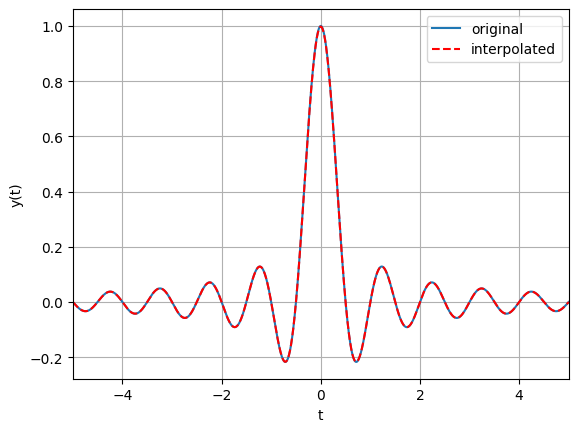

In [215]:
plt.plot(t, Y, label='original')
plt.plot(t, y_inter(t, t_sampled, y_sampled), 'r--', label='interpolated')
plt.grid(True)
plt.xlim(-5, 5)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()

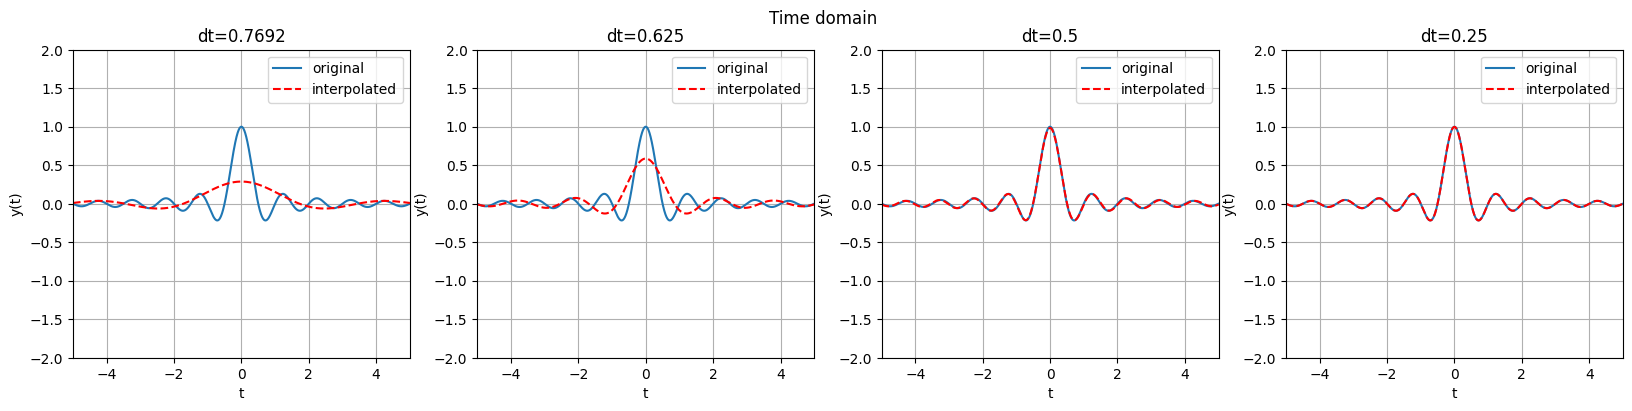

In [222]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
fig.suptitle('Time domain')
#fig.tight_layout()
BB = [0.65, 0.8, 1, 2]
for i in range(4):
    B = BB[i]
    sample_step = 1 / (2 * B)
    t_sampled = np.linspace(-T / 2, T / 2, int(T / sample_step))
    y_sampled = y(t_sampled)
    plt.sca(axs[i])
    plt.title(f'dt={np.round(1/(2*B), 4)}')
    plt.plot(t, Y, label='original')
    plt.plot(t, y_inter(t, t_sampled, y_sampled), 'r--', label='interpolated')
    plt.grid(True)
    plt.xlim(-5, 5)
    plt.ylim(-2, 2)
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()

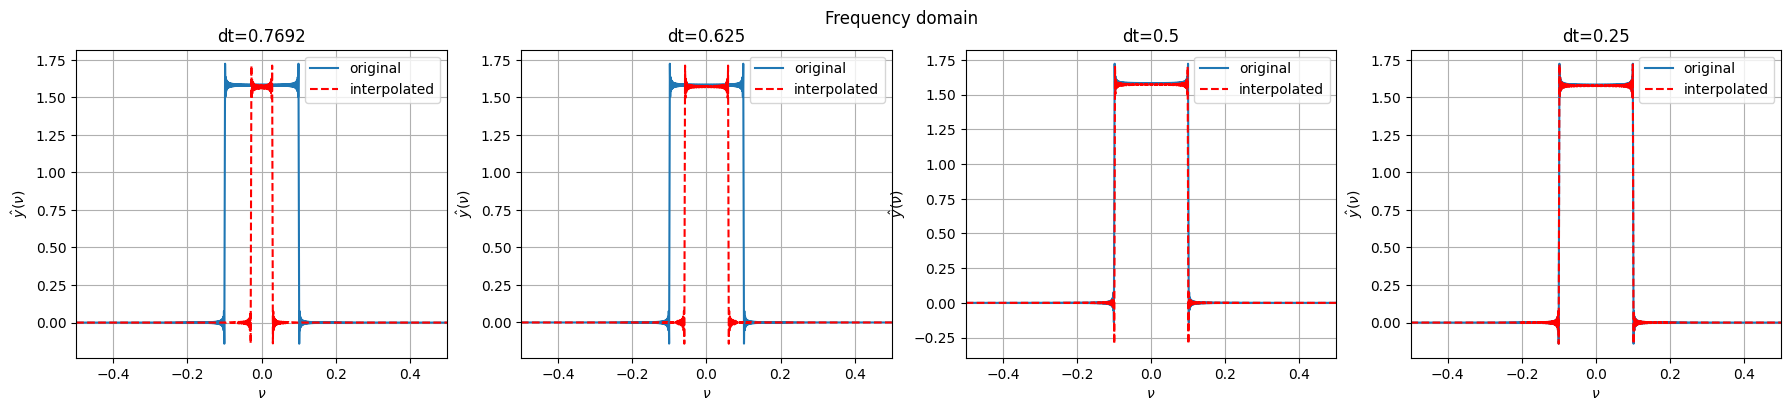

In [233]:
fig, axs = plt.subplots(1, 4, figsize=(22, 4))
fig.suptitle('Frequency domain')
#fig.tight_layout()
BB = [0.65, 0.8, 1, 2]
ft = (1 / np.sqrt(len(t))) * sp.fft.ifftshift(sp.fft.fft(sp.fft.fftshift(Y)))
for i in range(4):
    B = BB[i]
    sample_step = 1 / (2 * B)
    t_sampled = np.linspace(-T / 2, T / 2, int(T / sample_step))
    y_sampled = y(t_sampled)

    ft_inter = (1 / np.sqrt(len(t))) * sp.fft.ifftshift(sp.fft.fft(sp.fft.fftshift(y_inter(t, t_sampled, y_sampled))))
    plt.sca(axs[i])
    plt.title(f'dt={np.round(1/(2*B), 4)}')
    plt.plot(t, ft, label='original')
    plt.plot(t, ft_inter, 'r--', label='interpolated')
    plt.grid(True)
    plt.xlim(-0.5, 0.5)
    #plt.ylim(-2, 2)
    plt.xlabel('$\\nu$')
    plt.ylabel('$\\hat y(\\nu)$')
    plt.legend()